#SD204  TP SVD-PCA
##Yanting LI

In [15]:
import numpy as np
import scipy as sp
import pandas as pd
import time
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.close()

###Exercice 1. Retour sur l’algèbre linéaire
####Question (1)

In [16]:
mu, sigma= 0, 2
lam = 1e-5
#(a)
n, p = 100,2000
X = sigma * np.random.randn(n,p) + mu  # X
y = np.random.uniform(-1,1,n)          # y
Id_n = np.identity(n)                  # Unit vector Id_n
Id_p = np.identity(p)                  # Unit vector Id_p 
timeS = time.time()
left = np.dot(X.T,np.linalg.solve(np.add(np.dot(X,X.T),np.dot(lam,Id_n)),y))
timeE = time.time()
time_1L = timeE - timeS                  #the run time of the method on left (1)
timeS = time.time()
right = np.linalg.solve(np.add(np.dot(X.T,X),np.dot(lam,Id_p)),np.dot(X.T,y))
timeE = time.time()
time_1R = timeE - timeS                  #the run time of the method on right (1)
result = np.allclose(left,right)
print("(a) Avec n = 100 et p = 2000, la gauche et la droite sont égales ?")
print result

#(b)
n, p = 2000,100
X = sigma * np.random.randn(n,p) + mu 
y = np.random.uniform(-1,1,n)       
Id_n = np.identity(n)               
Id_p = np.identity(p)                  
timeS = time.time()
left = np.dot(X.T,np.linalg.solve(np.add(np.dot(X,X.T),np.dot(lam,Id_n)),y))
timeE = time.time()
time_2L = timeE - timeS                  #the run time of the method on left (2)
timeS = time.time()
right = np.linalg.solve(np.add(np.dot(X.T,X),np.dot(lam,Id_p)),np.dot(X.T,y))
timeE = time.time()
time_2R = timeE - timeS                  #the run time of the method on right (2)
result = np.allclose(left,right)
print("(b) Avec n = 2000 et p = 100, la gauche et la droite sont égales ?")
print result

(a) Avec n = 100 et p = 2000, la gauche et la droite sont égales ?
True
(b) Avec n = 2000 et p = 100, la gauche et la droite sont égales ?
True


&emsp;À partir de ces resultats, on voit que l'équation suivante est vraie:
$$X^T(XX^T+{\lambda}Id_n)^{-1}y=(X^TX+{\lambda}Id_p)^{-1}X^Ty$$


####Question (2)  
&emsp;Ici on compare le temps d'exécution des méthode gauche et méthode droite selon la taille de n et p:

In [14]:
print("(a) Pour n = 100, p = 2000:")
print("Le temps d'exécution pour la méthode gauche est %f" %time_1L)
print("Le temps d'exécution pour la méthode droite est %f" %time_1R)
print("(b) Pour n = 2000, p = 100:")
print("Le temps d'exécution pour la méthode gauche est %f" %time_2L)
print("Le temps d'exécution pour la méthode droite est %f" %time_2R)

(a) Pour n = 100, p = 2000:
Le temps d'exécution pour la méthode gauche est 0.003000
Le temps d'exécution pour la méthode droite est 0.565000
(b) Pour n = 2000, p = 100:
Le temps d'exécution pour la méthode gauche est 0.532000
Le temps d'exécution pour la méthode droite est 0.003000


&emsp;On voit que quand on utilise la dimention de 2000, le temps d'exécution est beaucoup plus grand que la dimention de 100. Donc on choisit l'une plus petite parmi n et p pour l’astuce du noyau.

###Exercice 2. Spectre de matrice aléatoire
####Question (3)
Pour cette question, la loi de poisson et la loi exponentielle sont choisies. Les moyennes sont mis nulle par moins 1 pour chaque élément dans une matrice comme ci-dessous:

In [4]:
n,p = 1000,200
X_poi = np.random.poisson(1, size = (n,p)) - 1
X_exp = np.random.exponential(1,size = (n,p)) - 1

####Question (4) 

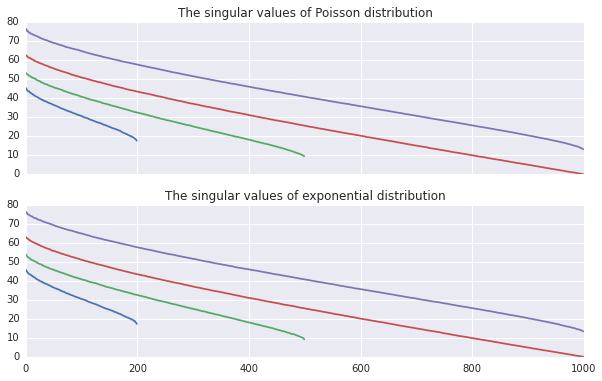

In [50]:
import matplotlib.pyplot as plt
n = 1000
p_array = [200,500,1000,2000]
fig, axes = plt.subplots(2,1, sharex = True, figsize=(10,6))
for p in p_array:
    X_poi = np.random.poisson(1, size = (n,p)) - 1
    s_poi = np.linalg.svd(X_poi, full_matrices=1,compute_uv=0)
    axes[0].plot(s_poi)
for p in p_array:
    X_exp = np.random.exponential(1, size = (n,p)) - 1
    s_exp = np.linalg.svd(X_exp, full_matrices=1,compute_uv=0)
    axes[1].plot(s_exp)
axes[0].set_title("The singular values of Poisson distribution")
axes[1].set_title("The singular values of exponential distribution")
plt.show()

####Question (5) Valeurs propres

/cal/softs/anaconda/anaconda-2.0.1/lib/python2.7/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


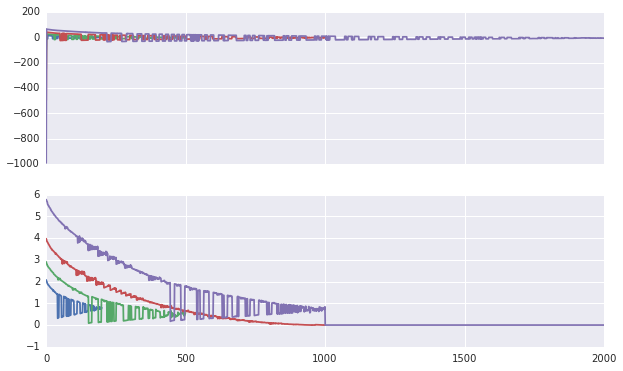

In [51]:
fig, axes = plt.subplots(2,1, sharex = True, figsize=(10,6))
for p in p_array:
    X_poi = np.random.poisson(1, size = (n,p)) - 1
    X = np.dot(X_poi.T,X_poi)/n
    evals, evecs = np.linalg.eig(X)
    axes[0].plot(evals)
for p in p_array:
    X_exp = np.random.exponential(1, size = (n,p)) - 1
    X = np.dot(X_exp.T,X_exp)/n
    evals, evecs = np.linalg.eig(X)
    axes[1].plot(evals)
plt.show()

In [ ]:
#a = np.ones(shape=(5,2))
#a = np.matrix('1 2 3 4;5 6 7 8;9 8 7 6;5 4 3 2')     #<class 'numpy.matrixlib.defmatrix.matrix'>
'''
a = np.array([[1,2,3,4], 
              [5,6,7,8],
              [9,8,7,6],
              [5,4,3,2.]])   #<type 'numpy.ndarray'>
evals, evecs = np.linalg.eig(a)
print a.T*a/5
print type(a.T*a/5)
b = np.array([1,0,1,0])
np.linalg.norm(b)
c = np.ones((4,4))
print np.subtract(a,c)
'''
X = np.random.randn(3,4)
print X
print X[]

###Exercice 3. Méthode de la puissance itérée

####Question (6) et (7)
Pour la matrice $X \in \Bbb{R}^{p\times{n}}$ , $u \in \Bbb{R}^{p\times{1}}$ et $v \in \Bbb{R}^{n\times{1}}$ sont choisis aléatoirement comme les vecteurs initiaux.<br>
Pour la question ci-dessous:<br>
- u_SVD est la matrice obtenue par la méthode np.linalg.svd<br>
- u est le vecteur obtenu par la méthode de la puissance itérée<br>
<br>
Quelques fois on obtient des vecteurs qui sont dans la direction contraire du résultat de méthode SVD, tel que (v–v_svd) soit grand plutôt que approche zéro.  Une méthode 'equalToSVD' est établi pour résoudre ce problème.

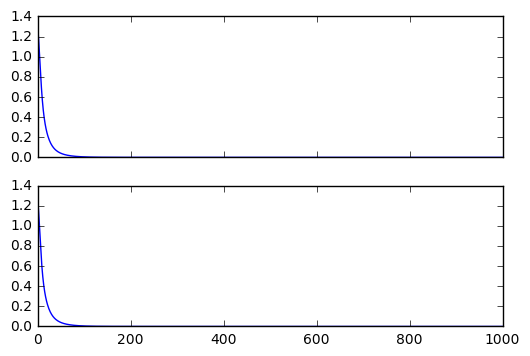

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
%matplotlib inline
plt.close()

# This function is for Question (7)
# Find the difference of v and v_svd according to their directions
# Input: vecteur v and vecteur got by SVD v_svd(with shape (n,1))
def equalToSVD(v,v_svd): 
    test_sub = abs(np.subtract(v,v_svd))
    test_add = abs(np.add(v,v_svd))
    if(np.mean(test_sub) < np.mean(test_add)): #The vectors v and v_svd are in the same direction
        result = np.linalg.norm(np.subtract(v,v_svd))
    else: #v and v_svd are in the oppesite direction
        result = np.linalg.norm(np.add(v,v_svd))
    return result       # Return: [float]

# Function: Power Iteration
def powerIteration(X,n_iter,u0,v0):     #X: (p,n)
    u = u0
    v = v0
    # Question (7)
    identi_u = np.zeros(n_iter)
    identi_v = np.zeros(n_iter)
    # Question (6)
    # Get the shape of matrix X:
    p,n = X.shape[0],X.shape[1]         # X: (p*n) 
    for j in range(0,n_iter):
        u = np.dot(X,v)
        v = np.dot(X.T,u)
        u = u*(1/np.linalg.norm(u))
        v = v*(1/np.linalg.norm(v))
        # The folowing lines are for Question (7)
        identi_u[j] = equalToSVD(u,u_svd)
        identi_v[j] = equalToSVD(v,v_svd)
        # End of code for Question (7)
    return u,v,identi_u,identi_v

n, p = 100,2000
X = np.random.randn(p,n)*2
n_iter = 1000
# SVD
u_SVD,s,v_SVD = np.linalg.svd(X, full_matrices=1,compute_uv=1)
u_svd = u_SVD.T[0].reshape((p,1))
v_svd = v_SVD[0].reshape((n,1))
# puissance itérée
u0 = np.random.randn(p,1)   
v0 = np.random.randn(n,1)
#u0 = np.ones((p,1))
#v0 = np.ones((n,1))
# Call the function
u,v,identi_u,identi_v = powerIteration(X,n_iter,u0,v0)
fig, axes = plt.subplots(2,1, sharex = True)
axes[0].plot(identi_u)
axes[1].plot(identi_v)
plt.show()

####Question (8)
Trois types des vecteurs initiaux sont appliqués dans cette question, ils sont:
- vecteur de la loi normal
- vecteur de ones
- (1,0,0,0,0......)

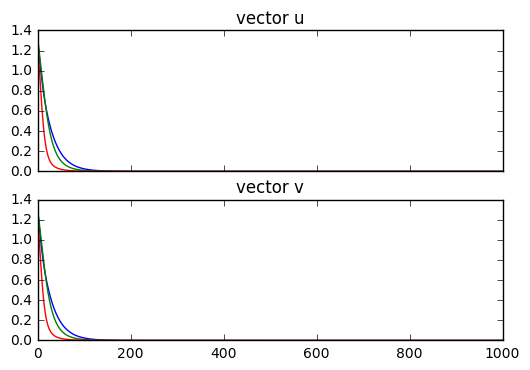

In [3]:
fig, axes = plt.subplots(2,1, sharex = True)
# a.random
u0 = np.random.randn(p,1)   
v0 = np.random.randn(n,1)
u,v,identi_u,identi_v = powerIteration(X,n_iter,u0,v0)
axes[0].plot(identi_u,'b')
axes[1].plot(identi_v,'b')
# b.ones
u0 = np.ones((p,1))
v0 = np.ones((n,1))
u,v,identi_u,identi_v = powerIteration(X,n_iter,u0,v0)
axes[0].plot(identi_u,'g')
axes[1].plot(identi_v,'g')
# c.uniform
u0 = np.zeros((p,1))
u0[0] = 1
v0 = np.zeros((n,1))
v0[0] = 1
u,v,identi_u,identi_v = powerIteration(X,n_iter,u0,v0)
axes[0].plot(identi_u,'r')
axes[0].set_title("vector u")
axes[1].plot(identi_v,'r')
axes[1].set_title("vector v")
plt.show()

####Question (9)

In [4]:
s = np.dot(np.dot(u.T, X),v)[0][0]  #<type 'numpy.float64'>
X_2 = np.subtract(X,s*np.dot(u,v.T))
u_2,v_2,_,_ = powerIteration(X_2,n_iter,u0,v0)
s_2 = np.dot(np.dot(u_2.T, X_2),v_2)[0][0]
print("La valeur singulière la plus grande obtenu pas Question(6) est: %f" %s)
print("La seconde valeur singulière la plus grande est: %f" %s_2)

La valeur singulière la plus grande obtenu pas Question(6) est: 110.185400
La seconde valeur singulière la plus grande est: 108.036114


###Exercice 4. PCA

####(10), (11) (12) et (13)

(10)


,Unnamed: 0,England,Wales,Scotland,N Ireland
0,Cheese,105,103,103,66
1,Carcass meat,245,227,242,267
2,Other meat,685,803,750,586
3,Fish,147,160,122,93
4,Fats and oils,193,235,184,209
5,Sugars,156,175,147,139
6,Fresh potatoes,720,874,566,1033
7,Fresh Veg,253,265,171,143
8,Other Veg,488,570,418,355
9,Processed potatoes,198,203,220,187


(12)


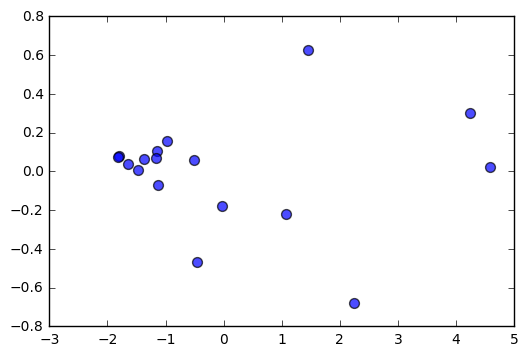

(13)


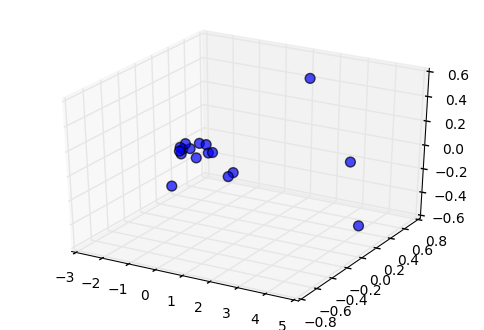

In [14]:
import numpy as np
import pandas as pd
import time
from sklearn import preprocessing
from sklearn.decomposition import PCA
from IPython.display import display
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.figure import Figure
%matplotlib inline

# Load data
df = pd.read_csv('defraconsumption.csv',sep = ";")
print("(10)")
display(df)

# (11)
X_raw = df.as_matrix(columns = df.columns[1:]).astype(float)
scaler = preprocessing.StandardScaler(with_mean=True, with_std=True).fit(X_raw)
X = scaler.transform(X_raw)

# (12)
print("(12)")
timeS = time.time()
pca = PCA(n_components = 2, copy = True)
pca.fit(X)
X_pca = pca.transform(X)
plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=50, alpha=0.7)  #s: size of points
plt.show()

# (13)
print("(13)")
pca = PCA(n_components = 3, copy = True)
pca.fit(X)
X_pca = pca.transform(X)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], s = 50, alpha = 0.7)
plt.show()
timeE = time.time()
time_PCA = timeE - timeS

####(14)

La matrice diagonqlisée est: 
[[  6.60091099e+01   3.71924713e-15   7.10542736e-15  -3.55271368e-15]
 [  1.74082753e-14   6.66882852e-02   1.02045108e-15  -4.96401965e-16]
 [ -7.10542736e-15   1.03042574e-15   1.31302950e+00   6.93889390e-17]
 [ -2.58092159e-14   3.57960189e-15  -2.50494070e-15   6.11172331e-01]]


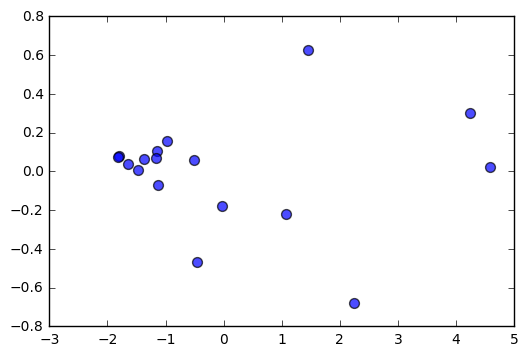

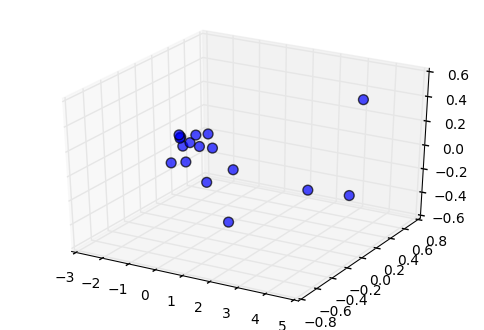

In [15]:
# (a)
timeS = time.time()
X_cov = np.dot(X.T, X)
eig_val, eig_vec = np.linalg.eig(X_cov)
# diagolize
diag = np.dot(np.dot(np.linalg.inv(eig_vec),X_cov),eig_vec)
print("La matrice diagonqlisée est: ")
print diag
# Calculate the eigenvectors and eigenvalues
eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(X.shape[1])]
# Sort eig_vec based on eig_val from highest to lowest
eig_pairs.sort(reverse=True)
# Select k eig_val as the principle components 
k = 2
component = np.array([ele[1] for ele in eig_pairs[:k]])
X_new = np.dot(X, component.T)
plt.figure()
plt.scatter(X_new[:, 0], X_new[:, 1], s=50, alpha=0.7)  
plt.show()

k = 3
component = np.array([ele[1] for ele in eig_pairs[:k]])
X_new = np.dot(X, component.T)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X_new[:, 0], X_new[:, 1], X_new[:, 2], s = 50, alpha = 0.7)
plt.show()
timeE = time.time()
time_XTX = timeE - timeS

&emsp;On voit que la matrice diagonalisée obtenue par calculer la matrice $X^{T}X$ a les valeurs propres sur la ligne diagonale, les autres éléments sont proche à 0, qui est acceptable.<br>
Pour les figures, ils sont pareilles en 2D et similaire en 3D.

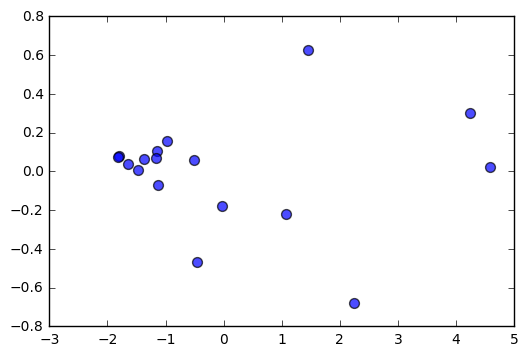

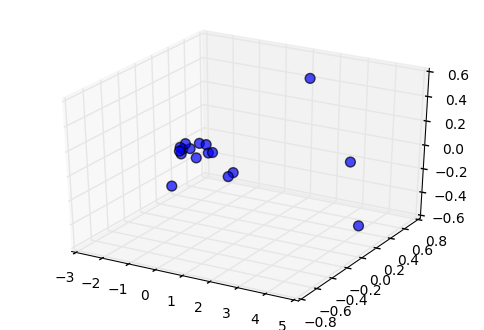

In [16]:
# (b)
timeS = time.time()
U,s,V = np.linalg.svd(X, full_matrices=1,compute_uv=1)
k = 2
U_k = np.array((U.T[:k]).T)
s_k = np.zeros((k,k))
for j in range(0,k):
    s_k[j][j] = s[j]
X_svd = np.dot(U_k,s_k)
plt.figure()
plt.scatter(X_svd[:, 0], X_svd[:, 1], s=50, alpha=0.7)  
plt.show()

k = 3
U_k = np.array((U.T[:k]).T)
s_k = np.zeros((k,k))
for j in range(0,k):
    s_k[j][j] = s[j]
X_svd = np.dot(U_k,s_k)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X_svd[:, 0], X_svd[:, 1], X_svd[:, 2], s = 50, alpha = 0.7)
plt.show()
timeE = time.time()
time_SVD = timeE - timeS

In [18]:
print("PCA time: %f" %time_PCA)
print("XTX time: %f" %time_XTX)
print("SVD time: %f" %time_SVD)

PCA time: 0.394000
XTX time: 0.478000
SVD time: 0.363000


&emsp;La méthode de SVD est plus efficace selon le temps de'exécution

###Exercice 5. Reconnaissance de visages par régression logistique

####Question (15)

In [1]:
from sklearn.datasets import fetch_lfw_people
# Download the data, if not already on disk and load it as numpy arrays
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape
X = lfw_people.data
n_features = X.shape[1]
# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]
print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


####Question(16)

&emsp;Les variables explicatives représent les niveaux de gris des pixels d'une image.

###Exercice 6. Analyse du jeu de données auto-mpg

####Question (18)

&emsp;Le marqueur utilisé pour les données manquantes dans le fichier utilisé est NAN. Pandas considère des valeurs comme NaN et None pour représenter les données manquantes.<br>
&emsp;Après avoir enlevé les lignes possédant des valeurs manquantes dans la base de données, le résultat ci-dessous est obtenu :


In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

# Load data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original'
dataNames = [ 'mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','car name']
data = pd.read_csv(url, sep=r"\s+", header = None, names = dataNames)
data.dropna(inplace=True)
display(data)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15,8,350,165,3693,11.5,70,1,buick skylark 320
2,18,8,318,150,3436,11.0,70,1,plymouth satellite
3,16,8,304,150,3433,12.0,70,1,amc rebel sst
4,17,8,302,140,3449,10.5,70,1,ford torino
5,15,8,429,198,4341,10.0,70,1,ford galaxie 500
6,14,8,454,220,4354,9.0,70,1,chevrolet impala
7,14,8,440,215,4312,8.5,70,1,plymouth fury iii
8,14,8,455,225,4425,10.0,70,1,pontiac catalina
9,15,8,390,190,3850,8.5,70,1,amc ambassador dpl


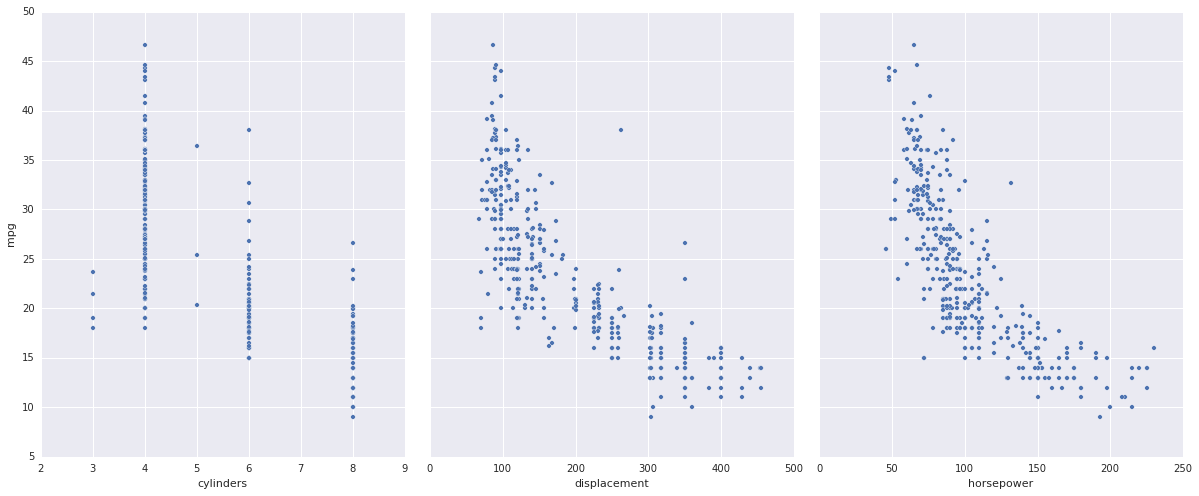

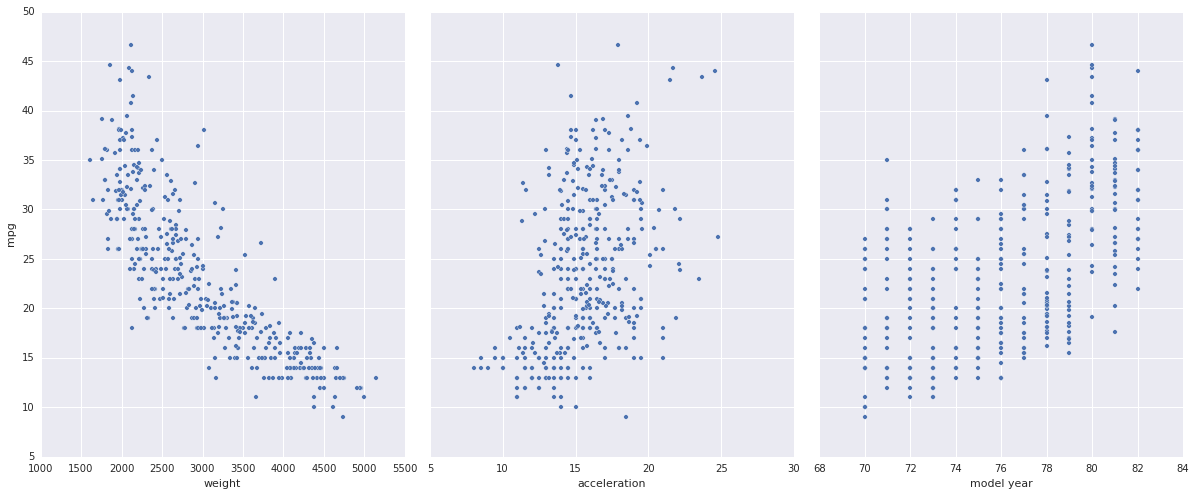

In [20]:
import seaborn as sns
%matplotlib inline
display(sns.pairplot(data, x_vars=['cylinders','displacement','horsepower'], y_vars='mpg', size=7, aspect=0.8))
display(sns.pairplot(data, x_vars=['weight','acceleration','model year'], y_vars='mpg', size=7, aspect=0.8))

####Question (19)

In [12]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Select a subset of the original DataFrame
data_sub = data.iloc[:9,:7]
print("La sous partie choisie est:")
display(data_sub)
# Create the matrix X:
feature_cols = ['cylinders','displacement','horsepower','weight','acceleration','model year']
X = data_sub[feature_cols]
# Create y:
y = data_sub['mpg']
# Calculate the least squares estimator
linreg = LinearRegression()
linreg.fit(X, y)
# Pair the feature names with their coefficients
result = zip(feature_cols, linreg.coef_)
print("\nOn met ensemble les variables et leur coefficients:")
display(result)
# Predict y
y_pred = linreg.predict(X)
print("\nLa prédiction de y^:")
print y_pred

La sous partie choisie est:


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18,8,307,130,3504,12.0,70
1,15,8,350,165,3693,11.5,70
2,18,8,318,150,3436,11.0,70
3,16,8,304,150,3433,12.0,70
4,17,8,302,140,3449,10.5,70
5,15,8,429,198,4341,10.0,70
6,14,8,454,220,4354,9.0,70
7,14,8,440,215,4312,8.5,70
8,14,8,455,225,4425,10.0,70



On met ensemble les variables et leur coefficients:


[('cylinders', 0.0),
 ('displacement', 0.0540884756682775),
 ('horsepower', -0.094530596161999991),
 ('weight', -0.0042407367063116638),
 ('acceleration', -0.19936701268572868),
 ('model year', 0.0)]


La prédiction de y^:
[ 17.83593432  16.15135218  17.02803274  16.08414928  17.15247702
  14.85588522  14.27266143  14.2658702   13.35363761]


&emsp;Pour les variables 'cylinders' et 'model year', les coefficients sont zéro, qui est d'accord avec le fait que 'cylinders' et 'model year' sont constantes dans les 9 premières lignes.<br>
&emsp;Pour la prédiction de y^ en utilisant l'estimateur obtenu, on vérifie que le résultat est similaire que le data affichi dans le colonne 'mpg'.

####Question (20)

[('cylinders', -0.56194996095439431),
 ('displacement', 0.80247615540735828),
 ('horsepower', -0.015044503769494746),
 ('weight', -5.763999713309909),
 ('acceleration', 0.23495703662331247),
 ('model year', 2.7716641465252834)]


La prédiction de y^:


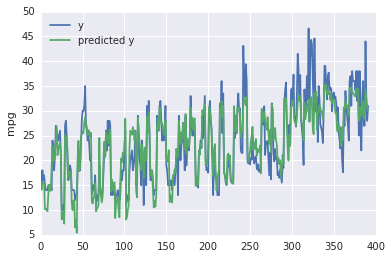

In [47]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
%matplotlib inline


data_sub = data.iloc[:,:7]
# X
X_raw = data_sub.iloc[:,1:]
# Centrer et reduire:
scaler = preprocessing.StandardScaler(with_mean=True, with_std=True).fit(X_raw)
X = scaler.fit_transform(X_raw)
# y
y = data.iloc[:,0].as_matrix()
# Calculate the least squares estimator
linreg = LinearRegression()
linreg.fit(X, y)
fit_pairs = zip(feature_cols, linreg.coef_)
display(fit_pairs)
# Predict y
y_pred = linreg.predict(X)
print("\nLa prédiction de y^:")
plt.figure()
plt.plot(y,label='y')
plt.plot(y_pred,label='predicted y')
plt.legend(loc='upper left')
plt.ylabel('mpg')
plt.show()

&emsp;Les deux variables qui expliquent le plus la consommation d'un véhicule sont :<br> 
 - weight 
 - model year

####Question (21)

In [38]:
r_sq = np.square(np.linalg.norm(np.subtract(y,y_pred)))
n,p = X.shape
print("r_sq est: %f" %r_sq)
r_sqN = r_sq/(n-p)
print("r_sqN est: %f" %r_sqN)
I_n = np.ones(n)
left = np.square(np.linalg.norm(np.subtract(y, np.mean(y)*I_n)))
right = r_sq + np.square(np.linalg.norm(np.subtract(y_pred, np.mean(y)*I_n)))
print("\nleft est: %f" %left)
print("right est: %f" %right)

r_sq est: 4543.347025
r_sqN est: 11.770329

left est: 23818.993469
right est: 23818.993469


&emsp;On vérifie que la gauche et la droite sont équivalentes.

####Question (22)

In [48]:
x_raw = np.array([6,225,100,3233,15.4,76])
X_test = scaler.transform(x_raw)
y_res = linreg.predict(X_test)
print y_res

[ 21.77622018]


/cal/softs/anaconda/anaconda-2.0.1/lib/python2.7/site-packages/sklearn/preprocessing/data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/cal/softs/anaconda/anaconda-2.0.1/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


&emsp;On voit que le résult est proche à 22.

####Question (23)

In [40]:
from sklearn.preprocessing import PolynomialFeatures
data_sub = data.iloc[:,:7]
poly = PolynomialFeatures(2,interaction_only=False)
X_pro = poly.fit_transform(X)
scaler = preprocessing.StandardScaler(with_mean=True, with_std=True).fit(X_pro)
X_nor = scaler.transform(X_pro)
print X_nor

[[ 0.          1.48394702  1.07728956 ...,  0.41876238  1.7022124
   1.79964325]
 [ 0.          1.48394702  1.48873169 ...,  0.73956246  1.98134019
   1.79964325]
 [ 0.          1.48394702  1.1825422  ...,  1.10266964  2.26046797
   1.79964325]
 ..., 
 [ 0.         -0.86401356 -0.56847897 ...,  0.67201788 -2.49003925
   1.83931243]
 [ 0.         -0.86401356 -0.7120053  ...,  0.14922297  1.44442408
   1.83931243]
 [ 0.         -0.86401356 -0.72157372 ...,  0.61746762  1.89407703
   1.83931243]]


&emsp;La nouvelle matrice a des variables explicatives non seulement d'ordre une, et aussi ordre deux.

####Question (24)

&emsp;Dans cette question, les données brutes sont divisé dans deux parties :<br>
 - Les premières 6 colonnes à centrer et réduire
 - Les dernières 3 colonnes générée de 'origin', il faut laisser non modifié

In [45]:
n = data.shape[0]
p = 9
X = np.zeros((n,p))
# Divide data_sub into two parts:
# data_sub1 : to be normolized
# data_sub2 : remain unchanged
data_sub1 = data.iloc[:,1:7]
data_sub2 = data.iloc[:,7:8]
data_sub2["origin"] = data_sub2["origin"].astype("category")
data_sub2 = pd.get_dummies(data_sub2)
data_sub2 = data_sub2.as_matrix()
# Centrer et réduire:
scaler = preprocessing.StandardScaler(with_mean=True, with_std=True).fit(data_sub1)
data_sub1 = scaler.transform(data_sub1)
# Create new matrix X
X[:,:6] = data_sub1
X[:,6:] = data_sub2
# y
y = data.iloc[:,0].as_matrix()
linreg = LinearRegression(fit_intercept=False)
linreg.fit(X, y)
origin = ['usa', 'europe', 'japan']
pairs = zip(origin, linreg.coef_[6:])
print("Les trois pays de origin et leur coéfficients sont:")
display(pairs)

Les trois pays de origin et leur coéfficients sont:


[('usa', 22.414680636400771),
 ('europe', 25.044682996418143),
 ('japan', 25.267908864878226)]

&emsp;Parmi les trois pays, 'japan' est la plus efficace en terme de consommation, avec le coéfficient plus grand. 

####Question (25)

####Question (26)

In [ ]:
X = data.iloc[:,1:7]